<a href="https://colab.research.google.com/github/oguz81/ArcballCamera/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#This is a image classification ML model.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cifar10 =tf.keras.datasets.cifar10

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [41]:
train_images.shape

(50000, 32, 32, 3)

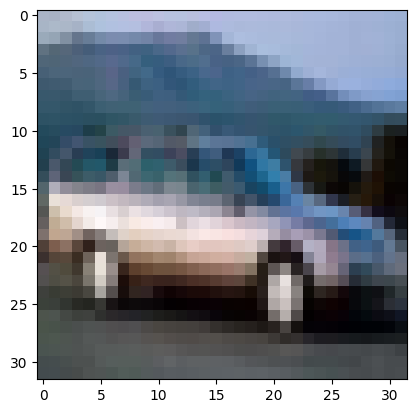

In [5]:
plt.figure()
plt.imshow(train_images[4])
plt.grid(False)
plt.show()

In [16]:
train_labels[4]


array([1], dtype=uint8)

In [6]:
class_names = ['airplane','car','bird','cat', 'deer', 'dog', 'frog', 'horse',
             'ship', 'truck']

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [8]:
train_labels = train_labels.flatten()

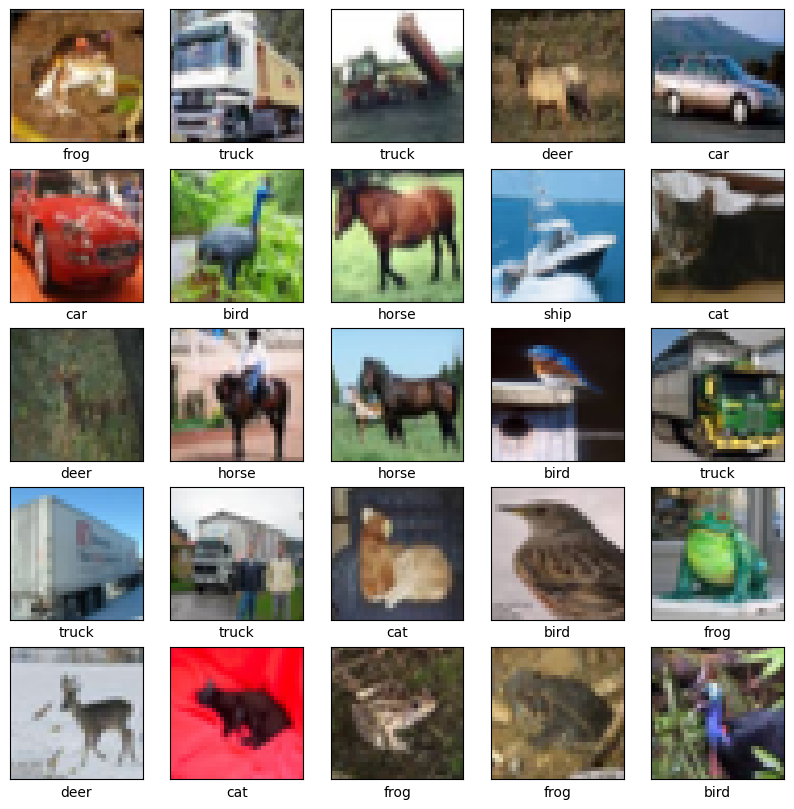

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [36]:
class_names[train_labels[6]]

'bird'

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 82s 51ms/step - loss: 1.5002 - accuracy: 0.4519 - val_loss: 1.2076 - val_accuracy: 0.5631
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1411 - accuracy: 0.5943 - val_loss: 1.0891 - val_accuracy: 0.6106
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0052 - accuracy: 0.6468 - val_loss: 0.9844 - val_accuracy: 0.6519
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9150 - accuracy: 0.6794 - val_loss: 0.9594 - val_accuracy: 0.6704
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8442 - accuracy: 0.7061 - val_loss: 0.9181 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7821 - accuracy: 0.7266 - val_loss: 0.8859 - val_accuracy: 0.6927
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7298 - accuracy: 0.7448 - val_loss: 0.8756 -

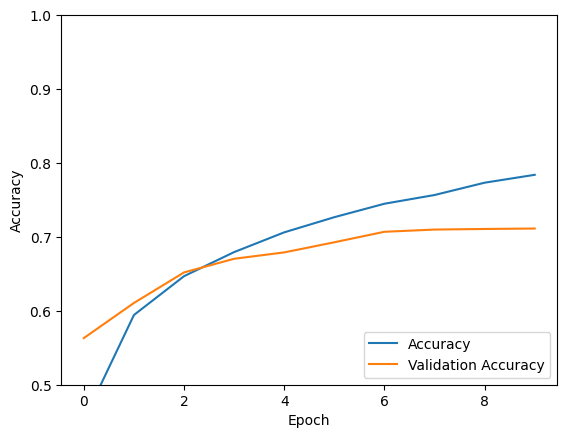

In [19]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.show()

In [20]:
print(test_acc)

0.7045999765396118
